# Part III, Lab 3
## Moments of distribution
1. create functions for mean, var and skew
2. apply your functions to a standard normal distribution of 1000 values
2. check your skew function against `scipy.stats.skew`

In [1]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt

In [2]:
def mean(x):
    return sum(x)/len(x)

In [3]:
def var(x):
    x_bar = mean(x)
    tot = 0
    for i in x:
        tot += (i - x_bar)**2
    return tot/(len(x)-1)

In [4]:
def skew(x):
    x_bar = mean(x)
    sigma = var(x)**0.5
    tot = 0
    for i in x:
        tot += ((i-x_bar)/sigma)**3
    return tot/len(x)

In [5]:
a = np.random.sample(1000)
print(skew(a))
print(sc.skew(a, bias=False))

-0.0560718616442
-0.05624047057500352


## Standard normal distribution
1. Create a distribution by adding to a first set of 500 data values that represent a standard normal distribtion a second distribution that you obtain by applying the following operation: $a \rightarrow 0.5a-1.5$. Make a histogram of that combined distribution with 20 bars.
2. Calculate the skew. Repeat the same exercise but applying for the second set the operation $a \rightarrow 0.3a+2.$

In [6]:
def pdf_normal(x, mu, var):
    normal = sqrt(2 * np.pi * var)
    expon = -(x - mu)**2 / (2 * var)
    return exp(expon) / normal

0.59353412952


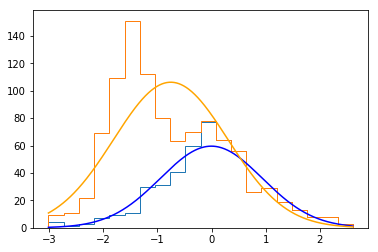

In [7]:
nn = 500
nbins = 20

x = np.random.standard_normal(nn)
a = 0.5*x - 1.5
a = np.append(x, a)
print(skew(a))

n, bins, pacthes = plt.hist(x, nbins, histtype='step')
bin_width = abs(bins[0]-bins[-1])/nbins
domain = np.linspace(bins[0], bins[-1], nn)
prob_dist = pdf_normal(domain, mean(x), var(x))
plt.plot(domain, prob_dist*nn*bin_width, 'b')

n, bins, pacthes = plt.hist(a, nbins, histtype='step')
bin_width = abs(bins[0]-bins[-1])/nbins
domain = np.linspace(bins[0], bins[-1], nn)
prob_dist = pdf_normal(domain, mean(a), var(a))

plt.plot(domain, prob_dist*len(a)*bin_width, 'orange')

-0.744923897906


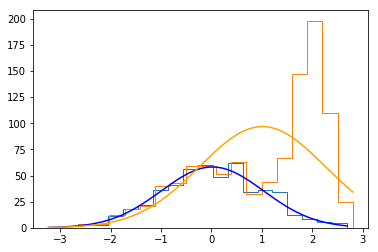

In [8]:
nn = 500
nbins = 20

x = np.random.standard_normal(nn)
a = 0.3*x + 2 
a = np.append(x, a)
print(skew(a))

n, bins, pacthes = plt.hist(x, nbins, histtype='step')
bin_width = abs(bins[0]-bins[-1])/nbins
domain = np.linspace(bins[0], bins[-1], nn)
prob_dist = pdf_normal(domain, mean(x), var(x))
plt.plot(domain, prob_dist*nn*bin_width, 'b')

n, bins, pacthes = plt.hist(a, nbins, histtype='step')
bin_width = abs(bins[0]-bins[-1])/nbins
domain = np.linspace(bins[0], bins[-1], nn)
prob_dist = pdf_normal(domain, mean(a), var(a))

plt.plot(domain, prob_dist*len(a)*bin_width, 'orange')

## Least-square fitting
Fit a Gaussian (propability denisty of the normal distribution) to both skewed distributions from the previous part.

## Linear correlation


1. create a point cloud by plotting to normal distribtions against each other. Each as 500 values.
2. Create a linear shear mapping transformation matrix `T2 = matrix([[1,1.],[0,1]])` to these double-normal (x,y) data points. Plot both data sets in one plot.
3. Write a function that calculates Pearson's r correlation coeffecient. Calculate the coefficent for both data sets. 
4. Compare your result with the equivalent `scipy.stats` routine.

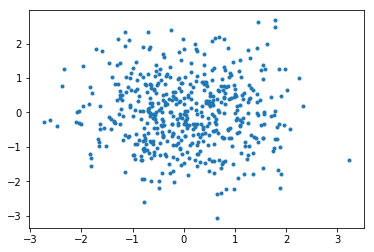

In [10]:
n = 500
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)
plt.plot(x, y, '.')

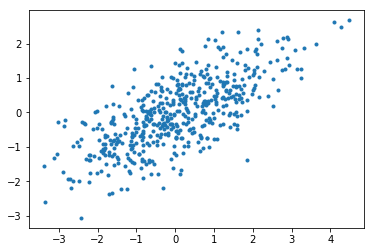

In [20]:
T2 = matrix([[1, 1], [0, 1]])
shear = np.dot(T2, (x,y)).T
plt.plot(shear[:, 0], shear[:, 1], '.')

In [21]:
def pearsr(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    return sum((x-xbar) * (y-ybar)) / (np.sqrt(sum((x-xbar)**2)) * np.sqrt(sum((y-ybar)**2)))

In [42]:
print(pearsr(x, y))
print(pearsr(np.asarray(shear[:, 0]), np.asarray(shear[:, 1])))

-0.0182662451531
0.711076896478


In [47]:
print(sc.pearsonr(x, y)[0])
print(sc.pearsonr(np.asarray(shear[:, 0]), np.asarray(shear[:, 1]))[0])

-0.0182662451531
[ 0.7110769]
